In [1]:
import pandas as pd

titanic_df = pd.read_csv (r'C:\Users\pc\Downloads\titanic-passengers.csv', sep = ';')
print (titanic_df)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
88

In [2]:
titanic_df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


In [3]:
column_names = titanic_df.columns
for column in column_names:
    print(column + ' - ' + str(titanic_df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [4]:
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("C23 C25 C27")

print(titanic_df["Cabin"].value_counts())

C23 C25 C27    691
G6               4
B96 B98          4
C22 C26          3
F2               3
              ... 
A10              1
A20              1
T                1
B3               1
C46              1
Name: Cabin, Length: 147, dtype: int64


In [5]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

print(titanic_df["Age"].value_counts())

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
66.000000      1
24.500000      1
80.000000      1
14.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64


In [6]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode())

print(titanic_df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
replacement_dict = {"Survived": {"Yes":1 ,"No":0}, "Sex": {"male":1, "female":0}}
titanic_df.replace(replacement_dict, inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C23 C25 C27,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C23 C25 C27,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C23 C25 C27,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = titanic_df['Sex'].values.reshape(-1,1)
y = titanic_df['Survived'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:xlabel='Age', ylabel='Survived'>

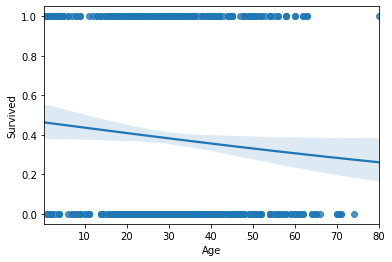

In [10]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data = titanic_df, logistic=True)

In [17]:
from sklearn.metrics import confimport matplotlib.pyplot as pltusion_matrix

y_true = y_test


confusion_matrix(y_true, y_pred)

array([[129,  15],
       [ 24,  55]], dtype=int64)

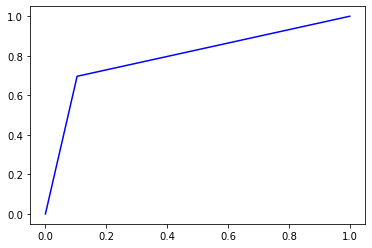

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' %auc) 
plt.show()